## Opening and Diplaying Images


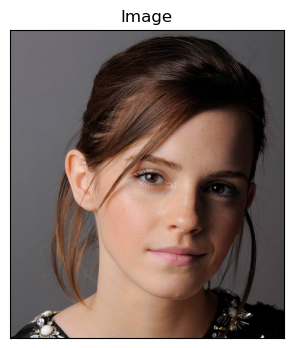

In [1]:
# Displaying with matplotlib

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline


fn = 'Images/emma.jpg'

imgo = cv.imread(fn, cv.IMREAD_REDUCED_COLOR_2)
imgo = cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
plt.figure(figsize=(16,4))
plt.imshow(imgo)
plt.title('Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Gaussian Noise Removal

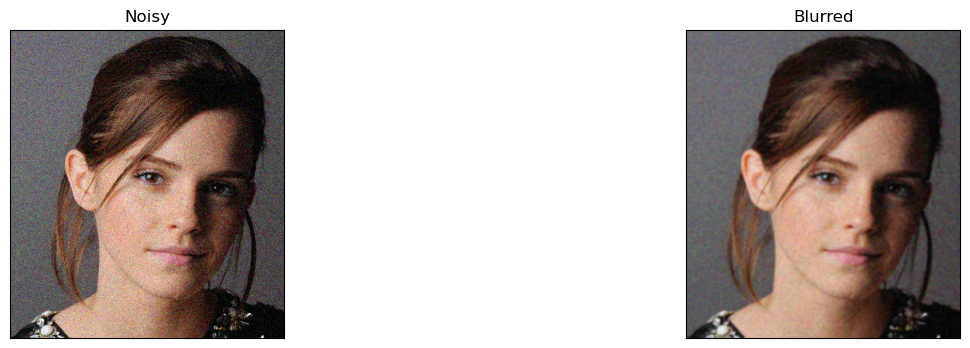

In [2]:
mu = 0.
sigma = 20.

noise = np.array(imgo.shape).astype('uint8')
noise = np.random.normal(mu,sigma,imgo.shape)
noise = noise.reshape(imgo.shape)

imgn = cv.add(imgo, noise, dtype=cv.CV_8UC3)
imgb = cv.GaussianBlur(imgn,(5,5),0)

f = plt.figure(figsize=(16,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(imgn), ax1.title.set_text('Noisy')
ax2.imshow(imgb), ax2.title.set_text('Blurred')
ax1.set_xticks([]), ax1.set_yticks([])  
ax2.set_xticks([]), ax2.set_yticks([]) 
plt.show()

## Salt-and-Pepper Noise Removal


(405, 360, 3)


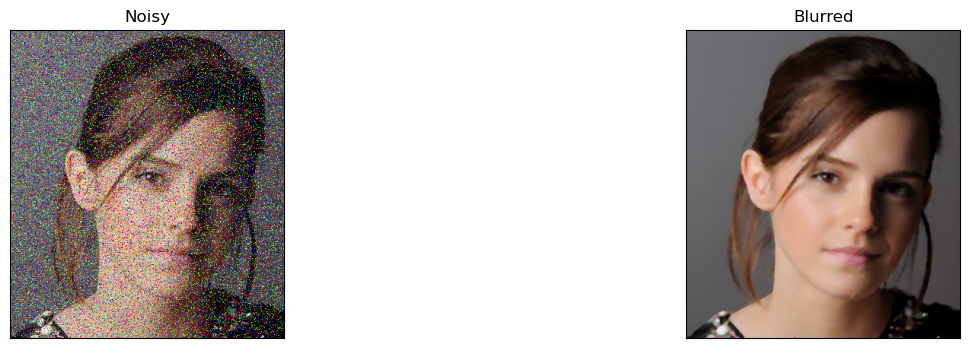

In [3]:
def salt_pepper_noise(img, p):
    print(img.shape)
    rnd = np.random.random(img.shape)
    noisy = img.copy()
    noisy[rnd < p] = 0
    noisy[rnd > 1 - p] = 255
    return noisy


imgs = salt_pepper_noise(imgo, 0.1)
imgm = cv.medianBlur(imgs, 5)

f = plt.figure(figsize=(16,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(imgs), ax1.title.set_text('Noisy')
ax2.imshow(imgm), ax2.title.set_text('Blurred')
ax1.set_xticks([]), ax1.set_yticks([])  
ax2.set_xticks([]), ax2.set_yticks([]) 
plt.show()

In [4]:
import os
import sys
folder = '../../EN2550Lectures/en2550_lec01_introduction/figures/'
fn = folder +  'galo.png'
cv.imwrite(fn, cv.cvtColor(imgo, cv.COLOR_RGB2BGR))

fn = folder +  'galn.png'
cv.imwrite(fn, cv.cvtColor(imgn, cv.COLOR_RGB2BGR))

fn = folder +  'galb.png'
cv.imwrite(fn, cv.cvtColor(imgb, cv.COLOR_RGB2BGR))

fn = folder +  'gals.png'
cv.imwrite(fn, cv.cvtColor(imgs, cv.COLOR_RGB2BGR))

fn = folder +  'galm.png'
cv.imwrite(fn, cv.cvtColor(imgm, cv.COLOR_RGB2BGR))

False